<a href="https://colab.research.google.com/github/anjali88/Data-Science/blob/master/Pushpanjali__Banik_AI_Cloud_and_Edge_Implementations_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# AI - Cloud and Edge Implementations - Assessment
## 1. Introduction

* Prior to taking this assessment, you should have completed the guided tutorials.
* To assess what you have learned, this notebook will take you through an end-to-end machine learning challenge and ask you to both implement code and to research and summarise key aspects of the machine learning process.

* Some points:
  * I will provide references to the course textbook so that you can refer to this as part of your research. You are free to use other resources, but please let me know what they are in your answers.
  * I will not be providing code. Feel free to use, or reuse some of the code provided already. For learning purposes, I would recommend that you do not copy and paste, and that you comment each line so that you know what is going on in the code.

* What we will assess:
  * I have provided assessment criteria:

![alt text](https://github.com/DanRHowarth/Artificial-Intelligence-Cloud-and-Edge-Implementations/blob/master/Screenshot%202019-12-12%20at%2021.16.45.png?raw=true)

  * We will cover your ability to understand and implement:
    * Exploratory Data Analysis
    * Understand which algorithms to use for a given problem
    * Select and implement appropriate metrics for assessing an algorithm
    * Model Selection and Evaluation, including when to use techniques such as cross validation 
    * An overall understanding of the different parts of machine learning and how it all fits together.
    * Optionally, More advanced techniques such as model pipelines, and ensemble methods and the chance to explore an algorithm in depth.

* We need to start with a dataset...
  * we will use the `wine` datatset that is part of the `scikit-learn` dataset class. This makes it easy for us to load in and to focus on skills. It is also used in the course textbook so provides opportunities for you to bring across techniques used in the book.
  * If you want to use your own, or a different dataset, please do (let me know though). The important thing is that we are testing skills and techniques, so please just answer the questions below as normal. 

In [1]:
# get dataset
from sklearn.datasets import load_wine

# we load the dataset and save it as the variable data
data = load_wine()

# if we want to know what sort of detail is provided with this dataset, we can call .keys()
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [0]:
import pandas as pd

## 2. Exploratory Data Analysis

*  I summarised some of the main parts of EDA here:

![alt text](https://github.com/DanRHowarth/Artificial-Intelligence-Cloud-and-Edge-Implementations/blob/master/Screenshot%202019-11-11%20at%2022.02.10.png?raw=true)

* You can also find more detail in the Raschka book, Chapter 4, p.109, and in the notebooks already provided. 

**2.1: Question**
* Can you set out what the key aspects of EDA are? What should it cover and what techniques can you use?

**2.1: Answer**
The EDA approach is precisely that--an approach--not a set of techniques, but an attitude/philosophy about how a data analysis should be carried out. Main reasons we use EDA:
* detection of mistakes
* checking of assumptions
* preliminary selection of appropriate models
* determining relationships among the explanatory variables, and
* assessing the direction and rough size of relationships between explanatory
and outcome variables.

The approach employs a variety of techniques (mostly graphical) to: 
1.   maximize insight into a data set;
2.   uncover underlying structure;
3.   extract important variables;
4.   detect outliers and anomalies;
5.   test underlying assumptions;
6.   develop parsimonious models;
7.   determine optimal factor settings.

The particular graphical techniques employed in EDA are often quite simple, consisting of various techniques of:

1. Plotting the raw data (such as data traces, histograms, bihistograms, probability plots, lag plots, block plots, and Youden plots.
2. Plotting simple statistics such as mean plots, standard deviation plots, box plots, and main effects plots of the raw data.
3. Positioning such plots so as to maximize our natural pattern-recognition abilities, such as using multiple plots per page.


**2.2: Question**
* Using the dataset and the techniques discussed, implement EDA below. Discuss your findings and how it influences and impacts on your modelling choices.



In [15]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['class_label'] = data.target
print(df.head())
print("\n")
#check data shape
print(df.shape)
print("\n")
#generate data descriptive statistics
print(df.describe())
print("\n")
#check for missing value
print(df.isnull())

   alcohol  malic_acid  ...  proline  class_label
0    14.23        1.71  ...   1065.0            0
1    13.20        1.78  ...   1050.0            0
2    13.16        2.36  ...   1185.0            0
3    14.37        1.95  ...   1480.0            0
4    13.24        2.59  ...    735.0            0

[5 rows x 14 columns]


(178, 14)


          alcohol  malic_acid  ...      proline  class_label
count  178.000000  178.000000  ...   178.000000   178.000000
mean    13.000618    2.336348  ...   746.893258     0.938202
std      0.811827    1.117146  ...   314.907474     0.775035
min     11.030000    0.740000  ...   278.000000     0.000000
25%     12.362500    1.602500  ...   500.500000     0.000000
50%     13.050000    1.865000  ...   673.500000     1.000000
75%     13.677500    3.082500  ...   985.000000     2.000000
max     14.830000    5.800000  ...  1680.000000     2.000000

[8 rows x 14 columns]


     alcohol  malic_acid  ...  proline  class_label
0      False       False  ...    Fals

In [0]:
# check outliers
def get_outliers(data, columns):
    # we create an empty list
    outlier_idxs = []
    for col in columns:
        elements = data[col]
        # we get the mean value for each column
        mean = elements.mean()
        # and the standard deviation of the column
        sd = elements.std()
        # we then get the index values of all values higher or lower than the mean +/- 3 standard deviations
        outliers_mask = data[(data[col] > mean + 3*sd) | (data[col]  < mean  - 3*sd)].index
        # and add those values to our list
        outlier_idxs  += [x for x in outliers_mask]
    return list(set(outlier_idxs))

In [23]:
#Print outliers and remove the outliers
outliers = get_outliers(df, df.columns)
print('Outliers: ',df.loc[outliers,:])
print('Before drop outliers:' , df.shape)
df.drop(outliers, axis = 0, inplace=True)
print('After drop outliers:', df.shape)

Outliers:       alcohol  malic_acid  ...  proline  class_label
121    11.56        2.05  ...    465.0            1
69     12.21        1.19  ...    718.0            1
73     12.99        1.67  ...    985.0            1
59     12.37        0.94  ...    520.0            1
110    11.46        3.74  ...    562.0            1
115    11.03        1.51  ...    407.0            1
25     13.05        2.05  ...    830.0            0
123    13.05        5.80  ...    380.0            1
158    14.34        1.68  ...    660.0            2
95     12.47        1.52  ...    937.0            1

[10 rows x 14 columns]
Before drop outliers: (178, 14)
After drop outliers: (168, 14)


In [24]:
#split, train and test dataset
from sklearn.model_selection import train_test_split
X, y = df.iloc[:,0:13].values, df.iloc[:,13].values 

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30,random_state=0,stratify=y)
print('Train:', X_train.shape, y_train.shape[0])
print('Test:', X_test.shape, y_test.shape[0])

Train: (117, 13) 117
Test: (51, 13) 51


In [25]:
# first lets look at the data before normalisation 
df[0:10] 

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class_label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,0


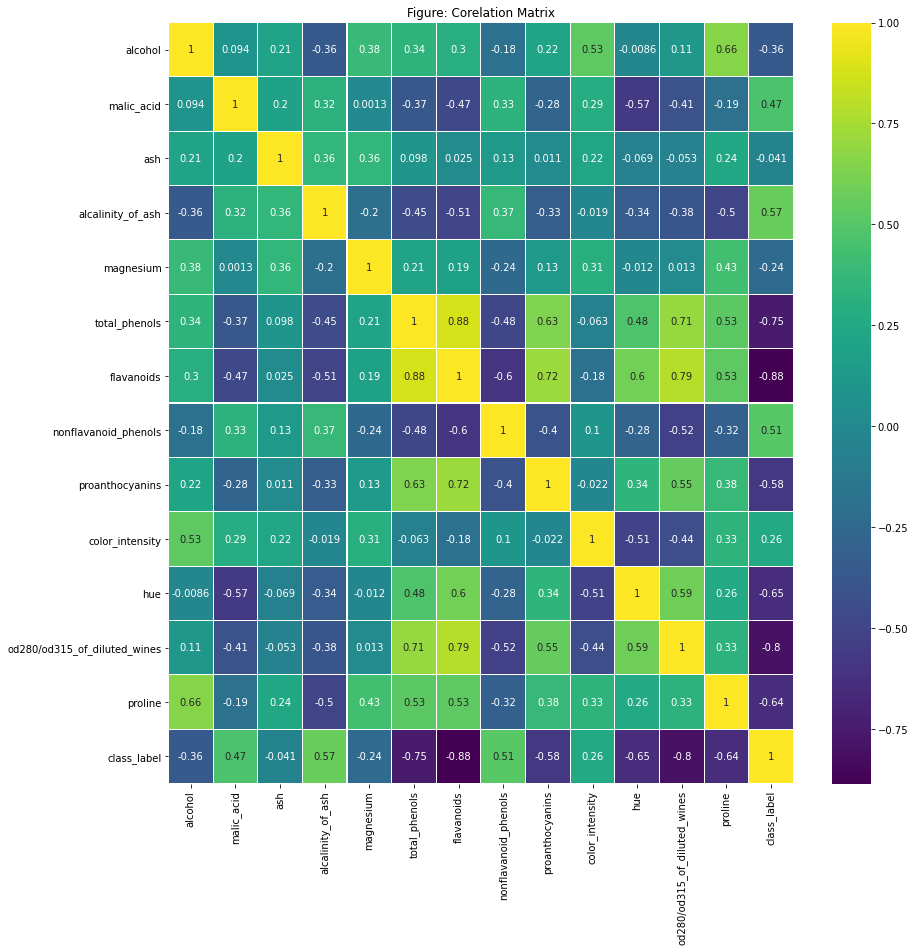

Relevant Features:

class_label                     1.000000
flavanoids                      0.884289
od280/od315_of_diluted_wines    0.802703
total_phenols                   0.750019
hue                             0.648309
proline                         0.644164
Name: class_label, dtype: float64


In [32]:
# we can now define the scaler we want to use and apply it to our dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# train on training set
X_train_norm = scaler.fit_transform(X_train)
# transform the test set
X_test_norm = scaler.transform(X_test)

#Find highly correlated features and select features with corr < 0.60
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
%matplotlib inline
cor=df.corr(method='pearson')
plt.figure(figsize=(14,14))
plt.title("Figure: Corelation Matrix")
cm=plt.cm.viridis
corr = sns.heatmap(cor,cmap=cm,linewidths=0.1,linecolor='white',annot=True, )
plt.show()

cor_target = abs(cor["class_label"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.60].sort_values(ascending=False)
print("Relevant Features:\n")
print(relevant_features)

## 3. Algorithm Selection

* Sections 3 - 5 of this notebook will refer to readings and ask questions that require written answers. Code implementation of these answers is in Section 6. The reason for doing it this way is that the techiques are very much intertwined, so splitting up the code implementations felt unnatural.
* A suggested way of working therefore is to go through the readings and answer questions below, while aslo implementing code under Section 6. That way you can learn while implementing and testing out code. 

* For section 3, refer to Raschka, Chapters 2, p.19, and 3, p.53, as well as the provided `scikit learn` tutorial.

**3.1: Question**
* Given our problem, what are the sort of algorithms we can use? What are their benefits and limitations?

From the EDA, we can conclude that we are looking at a Classification problem where the model takes input of features and outputs a class label. Hence, with assigned labels present in the dataset, we can use supervised learning classification algorithms such as 
* Decision Tree
* Naive Bayes
* K-NN 
* Logistic Regression
* SVM

The benfits and limitations of the above algorithms are summarised below 

Decision Tree Advantages :
* No preprocessing needed on data.
* No assumptions on distribution of data.
* Handles colinearity efficiently.
* Decision trees can provide understandable explanation over the prediction

Decision Tree Disadvantages :
* Chances for overfitting the model if we keep on building the tree to achieve high purity. decision tree pruning can be used to solve this issue.
* Prone to outliers.
* Tree may grow to be very complex while training complicated datasets.
* Looses valuable information while handling continuous variables.


Naive Bayes Advantages :
* works well with less training data.
* If NB conditional independence is satisfied, it converges faster than other discriminative models.
* Handles irrelevant features.
* Supports binary and multi-class classification problems.

Naive Bayes Disadvantages :
* expects the features to be strictly independent to each other, which is not applicable in real life scenarios.
* While training sample of a large population, and if we have a feature with P(X=feature|Y) as zero, the posterior probability will become zero. This happens when the sample is not representing the population properly.
* continuous variables are binned to extract discrete values from features. This task should be carefully done to avoid data loss.


KNN Advantages :
* Easy and simple machine learning model.
* Few hyperparameters to tune.

KNN Disadvantages :
* k should be wisely selected.
* Large computation cost during runtime if sample size is large.
* Proper scaling should be provided for fair treatment among features

Logistic Regression Advantages :
* Easy, fast and simple classification method.
* θ parameters explains the direction and intensity of significance of independent variables over the dependent variable.
* Can be used for multiclass classifications also.
* Loss function is always convex.

Logistic Regression Disadvantages :
* Cannot be applied on non-linear classification problems.
* Proper selection of features is required.
* Good signal to noise ratio is expected.
* Colinearity and outliers tampers the accuracy of LR model.

SVM Advantages :
* SVM uses kernel trick to solve complex solutions.
* SVM uses a convex optimization function, due to which global minima is always achievable.
* Hinge loss provides higher accuracy.
* Outliers can be well handled using soft margin constant C.

SVM Disadvantages :
* Hinge loss leads to sparsity.
* Hyper parameters and kernels are to be carefully tuned for sufficient accuracy.
* Longer training time for larger datasets.

Source: https://medium.com/@dannymvarghese/comparative-study-on-classic-machine-learning-algorithms-part-2-5ab58b683ec0

https://towardsdatascience.com/comparative-study-on-classic-machine-learning-algorithms-24f9ff6ab222



* For section 4, refer to Raschka, Chapter 6, p.191, as well as the provided `scikit learn` tutorial.

**4.1: Question**
* What are the differences betweed model evaluation and selection?

> Model evaluation:  aims to estimate the generalization accuracy of a model on future (unseen/out-of-sample) data. Obviously, a good machine learning model is a model that not only performs well on data seen during training (else a machine learning model could simply memorize the training data), but also on unseen data. Hence, before shipping a model to production we should be fairly certain that the model’s performance will not degrade when it is confronted with new data.

> Model selection: in the context of machine learning can have different meanings, corresponding to different levels of abstraction.is the task of selecting a statistical model from a set of candidate models, given data. is the task of selecting a statistical model from a set of candidate models, given data. However, the task can also involve the design of experiments such that the data collected is well-suited to the problem of model selection. 
 
> To avoid overfitting we need to distinction between model selection and evaluation. 

* What are the different techniques available to us? When would we use them?

There are two methods of evaluating models in data science, Hold-Out and Cross-Validation. Both methods use a test set (i.e data not seen by the model) to evaluate model performance.

> Holdout: The purpose of holdout evaluation is to test a model on different data than it was trained on. This provides an unbiased estimate of learning performance. The holdout approach is useful because of its speed, simplicity, and flexibility. However, this technique is often associated with high variability since differences in the training and test dataset can result in meaningful differences in the estimate of accuracy.

> Cross-Validation: is a technique that involves partitioning the original observation dataset into a training set, used to train the model, and an independent set used to evaluate the analysis.
The most common cross-validation technique is k-fold cross-validation, where the original dataset is partitioned into k equal size subsamples, called folds





## 5. Model Metrics
* For section 5, refer to Raschka, Chapter 6, p.211, as well as the provided `scikit learn` tutorial.

**5.1: Question**
* What are the most appropriate metrics for the models you have chosen and why?
Model evaluation metrics are required to quantify model performance. The choice of evaluation metrics depends on a given machine learning task (such as classification, regression, ranking, clustering, topic modeling, among others). 

Classification Accuracy :  is a common evaluation metric for classification problems. It’s the number of correct predictions made as a ratio of all predictions made.  we use this metrics for our multiclass scenario since EDA suggested that the dataset doesn't have imbalances.
We use sklearn module to compute the accuracy of a classification task

##6. Implementation of Sections 3 - 5
* Use the cells below to implement a model evaluation and selection strategy on the algorithms you have chosen against the metrics you believe are most appropriate



In [40]:
# Dummy Classifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
clf = DummyClassifier(strategy='stratified',random_state=0)
clf.fit(X_train_norm,y_train)
y_pred = clf.predict(X_test_norm)
print('Accuracy of a Random Classifier is: %.2f%%'%(accuracy_score(y_test,y_pred)*100))

Accuracy of a Random Classifier is: 35.29%


In [39]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix 
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train_norm, y_train) 
dtree_predictions = dtree_model.predict(X_test_norm) 
print('Accuracy of a DecisionTree Classifier is: %.2f%%'%(accuracy_score(y_test,dtree_predictions)*100)) 


Accuracy of a DecisionTree Classifier is: 80.39%


In [37]:
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 5).fit(X_train_norm, y_train) 
knn_predictions = knn.predict(X_test_norm)  
print('Accuracy of a a KNN classifier is: %.2f%%'%(accuracy_score(y_test,knn_predictions)*100)) 


Accuracy of a a KNN classifier is: 98.04%


In [41]:
#Support Vector Machine Classifier
from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train_norm, y_train) 
svm_predictions = svm_model_linear.predict(X_test_norm) 
  
# model accuracy for X_test   
#accuracy = svm_model_linear.score(X_test, y_test) 
print('Accuracy of a a linear SVM classifier is: %.2f%%'%(accuracy_score(y_test,svm_predictions)*100))  

Accuracy of a a linear SVM classifier is: 98.04%


In [0]:
from sklearn.model_selection import train_test_split, StratifiedKFold, learning_curve, validation_curve
def plot_learning_curve(train_sizes, train_scores, test_scores, title, alpha=0.1):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(train_sizes, train_mean, label='train score', color='blue', marker='o')
    plt.fill_between(train_sizes, train_mean + train_std,
                     train_mean - train_std, color='blue', alpha=alpha)
    plt.plot(train_sizes, test_mean, label='test score', color='red', marker='o')

    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, color='red', alpha=alpha)
    plt.title(title)
    plt.xlabel('Number of training points')
    plt.ylabel('accuracy-measure')
    plt.grid(ls='--')
    plt.legend(loc='best')
    plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


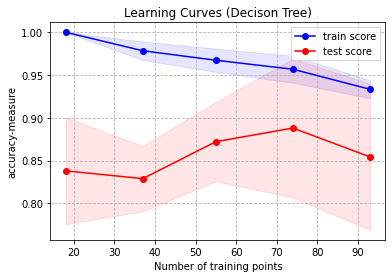

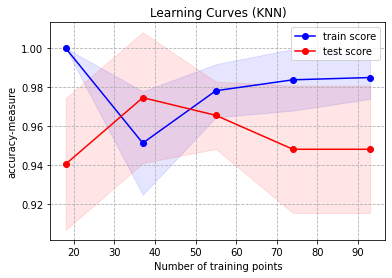

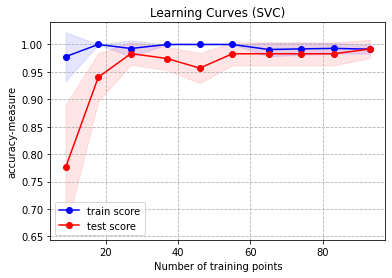

In [47]:

cv = StratifiedKFold(n_splits=5, random_state=42)
train_sizes, train_scores, test_scores = learning_curve(
        estimator=dtree_model, X=X_train_norm, y=y_train,
        train_sizes=np.arange(0.2, 1.1, 0.2), cv=cv, scoring='accuracy', n_jobs=- 1)
plot_learning_curve(train_sizes, train_scores, test_scores, title = "Learning Curves (Decison Tree)")


train_sizes, train_scores, test_scores = learning_curve(
        estimator=knn, X=X_train_norm, y=y_train,
        train_sizes=np.arange(0.2, 1.1, 0.2), cv=cv, scoring='accuracy', n_jobs=- 1)

plot_learning_curve(train_sizes, train_scores, test_scores, title = "Learning Curves (KNN)")


train_sizes, train_scores, test_scores = learning_curve(
        estimator=svm_model_linear, X=X_train_norm, y=y_train,
        train_sizes=np.arange(0.1, 1.1, 0.1), cv=cv, scoring='accuracy', n_jobs=- 1)

plot_learning_curve(train_sizes, train_scores, test_scores, title = "Learning Curves (SVC)")

plt.show()

## 7. Overall Understanding of ML

* In the class, we covered a framework for understanding how the pieces of ML fit together. 

![alt text](https://github.com/DanRHowarth/Artificial-Intelligence-Cloud-and-Edge-Implementations/blob/master/Screenshot%202019-11-11%20at%2022.01.44.png?raw=true)

* Do you agree with this framework? What is missing? Can you pull your own together? 

7.1: Answer

Provide your thoughts on the ML framework and develop your own if you prefer to.
> Once the model is deployed it needs to be monitored for performance evaluation maintainence for any new set of data. Furthermore, periodic re-training and fine tuning of parameters needs to be done to avoid any loss of model performance. Also, alternative models needs to be tested and evaluated to check scope for better performance. 

## 8. Optional Activities 
* For those of you who are already familiar with machine learning, or who just want to do some more learning, I would suggest looking at these topics:
  * explore one of the algorithms you used above in more depth. This could mean looking at the implementation of the algorithm on `scikit-learn` in more detail, or it could mean implementing it by hand. There are plenty of tutorials online, but please get in touch if you do not know where to start. 
  * explore the model pipelines features of `scikit-learn` in more detail. We covered this in the `scikit-learn` tutorial but there are more aspects to this that you could explore. Please see Rascka, Chapter 6, p. 191.
  * explore ensemble models, or other advanced models, in more details. Again, we covered this in the `scikit-learn` tutorial but there are more aspects to this that you could explore. Please see Rascka, Chapter 7, p. 223.
* Note that these exercises don't form part of your assessment, but are optional extras if you wish to learn more within the course environment and support network. 



